In [4]:
import BloomClassify as BC
import LSIsimilarity
from baseline import Baseline
import os
import languageProcess as lp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
LSIs = LSIsimilarity.LSIsimilarity()
CL = BC.BloomClassify(prct = 40, art = 50, baselineFolder="../Baseline/50/plaindata")

def loadModels():
    LSIs.train(basepath="../Baseline/1000/plaindata",noOfTrainArticle=5000)
    CL.load_BL()

def checkArticle(title):
    #title ='Football'
    # check if Validationfolder exists
    if not os.path.exists("../Validation"): os.mkdir("../Validation")

    # get article from wikipedia API
    Base = Baseline(folder="Validation")
    filename = "../Validation/"+title.replace(' ','')+"_raw.txt"
    with open(filename, 'w') as the_file:
        the_file.write(Base.get_dumptext([title]))

    #convert to plain text
    os.system("../wikiextractor/WikiExtractor.py "+"../Validation/"+title.replace(' ','')+"_raw.txt"+" -o"+" ../Validation/"+title.replace(' ','')+"/ --json")

    #housekeeping
    category = os.listdir("../Validation")
    if '.DS_Store' in category: category.remove('.DS_Store')

    #languageProcess
    filepath = "../Validation/"+title.replace(' ','')+"/AA/wiki_00"
    bfarticle = lp.languageProcess(filepath).getHighFreqWords()
    lsiarticle = lp.languageProcess(filepath)
    
    assert (len(bfarticle)>= 1),"No article with that name"
    
    #BloomFilter
    vali_dict = {}
    numOfCheckWords = 100

    for cat in CL.BFdict.keys():
        vali_dict[cat] = sum([1 for word in bfarticle[0].most_common(numOfCheckWords) if CL.BFdict[cat].classify(word[0])])/numOfCheckWords

    #Rewrite to return LSIres and BFres
    return LSIs.compare(lsiarticle.getWords()), vali_dict

def plotGraph(resLSI,resBF):
    ind = np.arange(len(resLSI))    # the x locations for the groups
    width = 0.2         # the width of the bars

    fig, ax = plt.subplots(figsize=(11,5))

    p1 = ax.bar(ind-width/2,list(resLSI.values()),width, align='center',color='dodgerblue')
    p2 = ax.bar(ind+width/2,list(resBF.values()),width, align='center',color='darkorange')

    ax.set_xticks(ind + width/2)
    ax.set_xticklabels(list(resLSI.keys()),rotation='vertical')
    ax.legend((p1[0], p2[0]), ('LSI1000','bloomfilter+tfidf'))
    ax.set_ylim([0,1])
    ax.set_ylabel('right assigned articles')
    ax.grid()
    plt.tight_layout()

    plt.show()

def main():
    loadModels()
    x=0
    while x<1:
        title = input("Insert Article name: ")
        #is title? exception
        print(title)
        resLSI, resBF = checkArticle(title)
        #placeholder resLSI for resBF
        plotGraph(resLSI,resBF)
        x+=1
    pass


loaded Traindata
Insert Article name: Football
Football
[(0, 0.366045), (1, 0.2812593), (2, 0.19984448), (3, 0.17835557), (4, 0.28213042), (5, 0.24903911), (6, 0.31531268), (7, 0.24556696), (8, 0.2182578), (9, 0.025676116), (10, 0.18917552), (11, 0.2766923), (12, 0.13887429), (13, 0.41326353), (14, 0.14082329), (15, 0.932505), (16, 0.29436448), (17, 0.18809992), (18, 0.15945064), (19, 0.3664125), (20, 0.18979415), (21, 0.33648914), (22, 0.3717183), (23, 0.08974819), (24, 0.38921383), (25, 0.151806), (26, 0.3559804)]


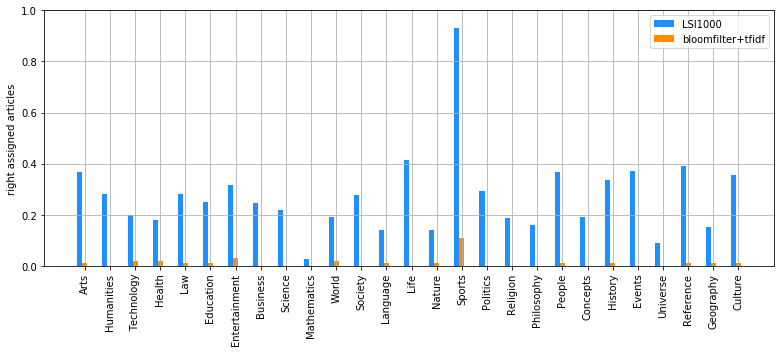

In [8]:
main()